# 第十七次作业

负责助教：杨礼铭，陈滨琪

截止时间：2023年5月14日周日 23:59

## 第零题 词向量可视化

In [ ]:
# 使用预训练模型获取词向量
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np

# 下载预训练模型
#model = api.load("glove-wiki-gigaword-50")
# 如果无法下载，运行下面的代码读取词向量
model = KeyedVectors.load_word2vec_format('./glove-wiki-gigaword-50.gz')

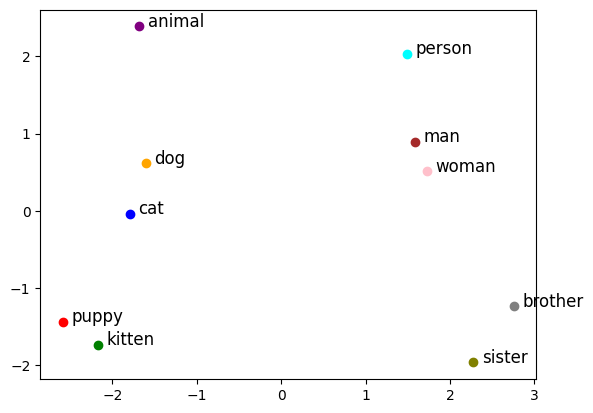

In [ ]:
words = ["cat", "dog", "kitten", "puppy", "animal" ,"man", "woman", "brother", "sister", "person"]
# 对给出的词向量降维到2维，并且绘制散点图
# 可以看出比较好地区分了动物相关的词与人相关的词，并且词意相近的词在二维空间中也比较接近
from sklearn.decomposition import PCA
vector = []
for word in words:
    vector.append(model.get_vector(word))
vector = np.array(vector,dtype=np.float32)
pca = PCA(2)
X = pca.fit_transform(vector)
x = X[:,0]
y = X[:,1]
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(len(words)):
    plt.scatter(x[i],y[i], c=color[i])
    plt.annotate(words[i], xy=(x[i]+0.1,y[i]), fontsize=12)
plt.show()

## 第一题 Word2Vec

本题目我们使用Gensim包。Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。
Gensim 提供了一系列强大的算法，如：

- Word2Vec：一种用于生成词向量的神经网络模型，能捕捉单词之间的语义和句法关系。
- FastText：一种类似 Word2Vec 的模型，但它可以处理词汇表外的单词，因为它基于字符级别的 n-gram 表示。
- Doc2Vec：扩展了 Word2Vec 的概念，可以生成整个文档或句子的向量表示。
- Latent Semantic Analysis (LSA)：一种用于降维和检索文档结构的统计技术。
- Latent Dirichlet Allocation (LDA)：一种广泛使用的主题模型算法，可以发现文档集合中的潜在主题。

安装Gensim：``pip install gensim``

参考网站：https://radimrehurek.com/gensim/


##### 加载预训练模型

gensim提供了一些语料和模型，可以通过数据接口下载。下载得到的模型默认保存在'~/gensim-data'目录下，详见https://github.com/RaRe-Technologies/gensim-data

使用接口下载并载入名为"glove-wiki-gigaword-50"的预训练模型。

In [ ]:
import gensim
from gensim.models import KeyedVectors
import gensim.downloader as api
# 若已经运行第0题，则无需继续运行以下内容
# 下载预训练模型
#model = api.load("glove-wiki-gigaword-100")
# 如果无法下载，运行下面的代码读取词向量
#model = KeyedVectors.load_word2vec_format('./glove-wiki-gigaword-50.gz')

### 1.1 请用载入的词向量模型完成以下几点：

1. 查看'dog'的词向量（0.5分）

2. 计算'dog'和'pet'的相似程度（0.5分）

3. 输出与'dog'最相似的十个词（1分）

提示：model里有非常多实用的方法，可以便捷地解决问题

In [ ]:

print('Vector for \'dog\':')
print(model.get_vector('dog'))
print(f'\nSimilarity between \'dog\' and \'pet\': ', end='')
print(model.similarity('dog', 'pet'), end='\n\n')
print('Top 10 words similar to \'dog\':')
for i in model.similar_by_word('dog',10):
    print(i[0]+': '+str(i[1]))

### 1.2 使用预训练 Word2Vec 模型找到不属于同一类的单词（1分）
在给定的单词列表 ['cat', 'dog', 'fish', 'bird', 'pigs', 'computer'] 中，找到与其他单词不属于同一类的单词。 注：参考方法：model.doesnt_match

In [ ]:
# 使用已加载的预训练模型
# model = api.load("glove-wiki-gigaword-100") 或 model = KeyedVectors.load_word2vec_format('./glove-wiki-gigaword-50.gz')

words = ['cat', 'dog', 'fish', 'bird', 'pigs', 'computer']

odd_one_out = model.doesnt_match(words)
print(f"The word that doesn't belong to the same category: {odd_one_out}")


### 1.3 使用预训练 Word2Vec 模型解决类比问题（1分）
请使用词向量之间的关系，解决类比问题 " Japan is to Tokyo as France is to ?"

注意，这里城市名称和国家名称都是小写，否则词表中找不到

计算得到目标向量后，可以使用model.similar_by_vector得到相似单词

In [23]:
# 解决类比问题 "Japan is to Tokyo as France is to ?"
# japan - tokyo ≈ france - ?


japan_tokyo = model.get_vector('japan') - model.get_vector('tokyo')

france = model.get_vector('france')
france_japan_tokyo = france - japan_tokyo

result_word = model.similar_by_vector(france_japan_tokyo, 1)[0][0]
print("Result of the analogy 'japan is to tokyo as france is to':", result_word)


Result of the analogy 'japan is to tokyo as france is to': paris


## 第二题：时间序列分析
本次作业中，我们将使用'./Stock_Price.csv'中的股票数据进行时间序列分析。数据包含了TWTR、KO和GM三个股票的价格。

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('./Stock_Price.csv')
df.head()


,Date,TWTR,KO,GM
0,2013-11-07,44.900002,30.350573,27.762348
1,2013-11-08,41.650002,30.518206,28.334280
2,2013-11-11,42.900002,30.381044,28.349743
3,2013-11-12,41.900002,30.388666,28.334280
4,2013-11-13,42.599998,30.571535,29.710032


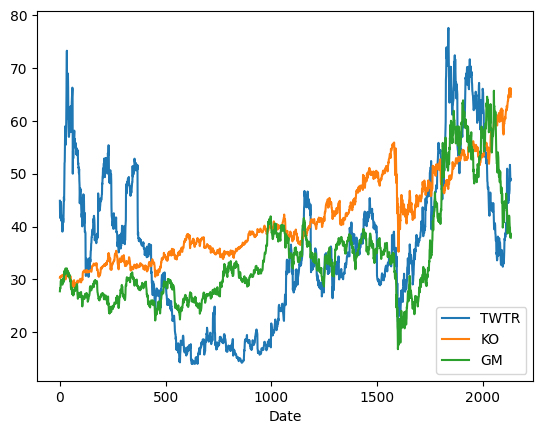

In [26]:
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df[['TWTR', 'KO', 'GM']].plot()
plt.xlabel('Date')
plt.show()

### 2.1 滑动窗口均值与标准差（2分）
选定一个滑动窗口大小（如30），在滑动窗口内计算均值与标准差，并绘制图像。

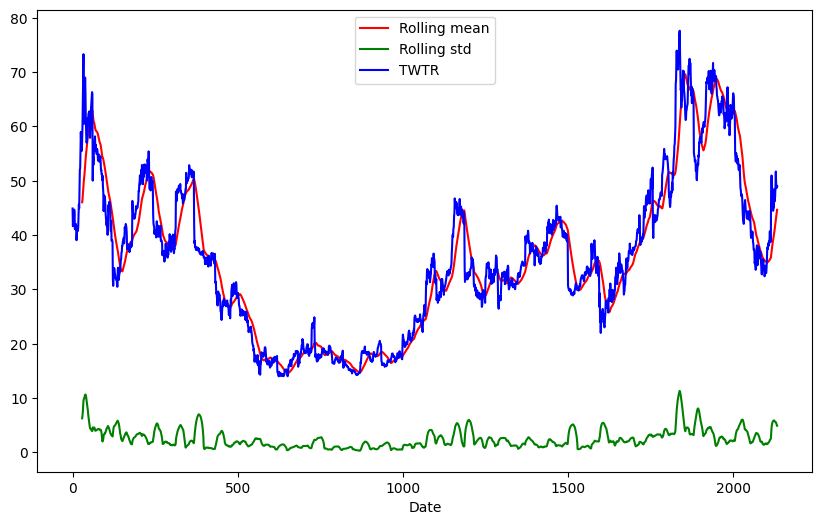

In [27]:
# 以TWTR股票为例
stock_data = df['TWTR']

mean = stock_data.rolling(30).mean()
std = stock_data.rolling(30).std()
stock_data = pd.concat([stock_data, mean, std], axis=1)
stock_data.columns = ['TWTR', 'Rolling mean', 'Rolling std']

stock_data[['Rolling mean', 'Rolling std','TWTR']].plot(color=['red', 'green', 'blue'],figsize=(10, 6),grid=False)

plt.xlabel('Date')
plt.show()


### 2.2 成分分解（2分）
对序列进行加法或乘法成分分解，并绘制图像。具体可见https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

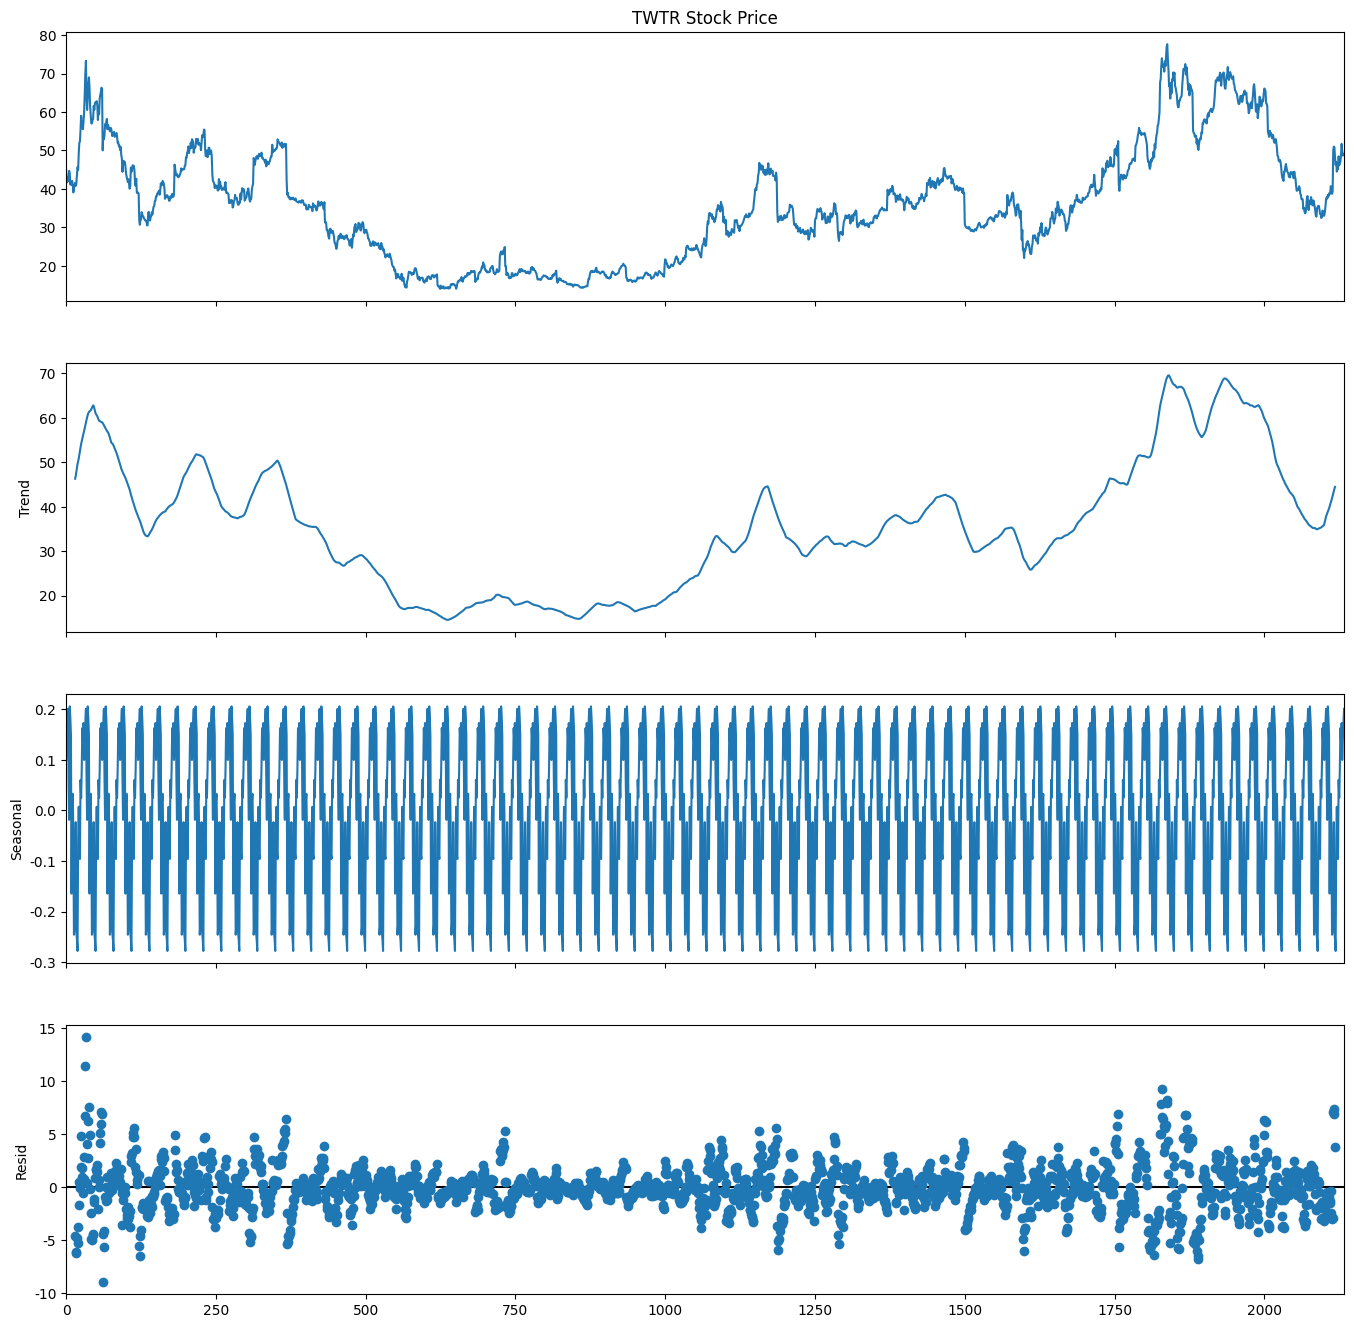

In [28]:

# 以TWTR股票为例
stock_data = df['TWTR']
stock_data.name = 'TWTR Stock Price'
res = seasonal_decompose(stock_data, model='additive', period=30)
res = res.plot()
res.set_size_inches(15, 15)


### 平稳序列（2分）
对序列迭代地进行差分，直到得到一个平稳序列(p_value<0.05)，绘制最终得到的序列及其自相关图。有能力的同学可以尝试其他方法，可作为加分项。（加分2分以内）

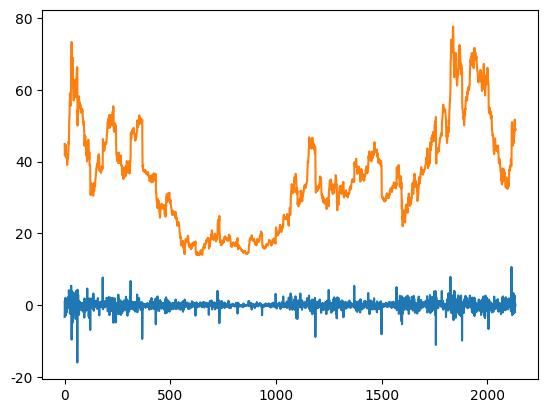

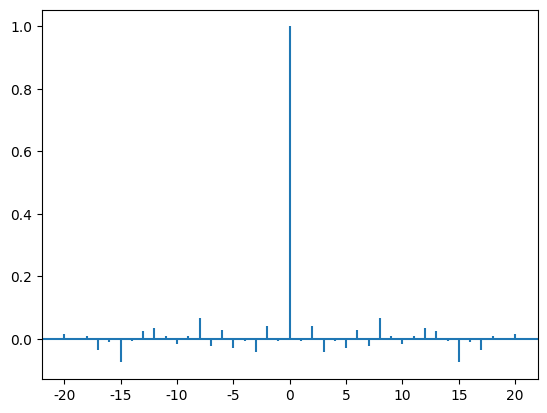

In [29]:
# TODO:
stock_data = df['TWTR']
def toStationary(data, alpha):
    p = 0
    while True:
        data = np.diff(data)
        p += 1
        res = adfuller(data)
        if res[1] < alpha:
            return data, p
dataZ, p = toStationary(data=stock_data, alpha=0.05)
plt.plot(pd.concat([pd.Series(dataZ),stock_data], axis=1))
# 绘制自相关图
plt.figure()
plt.acorr(dataZ, maxlags=20)
plt.show()